In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
from scipy.stats import zscore

In [2]:
df2 = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [3]:
df2.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
print("Sierra Leone Dataset Shape:")
print(df2.shape)

Sierra Leone Dataset Shape:
(525600, 19)


In [6]:
#select numeric columns
numeric_cols = df2.select_dtypes(include=[np.number])

In [7]:
#calculate summary statistics for each numeric column 
summary_stats = numeric_cols.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [8]:
df2.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [10]:
df2['WD'].unique()

array([  0. , 240.4, 233.5, ..., 123. , 104.8, 109.7])

In [11]:
df2['ModA'].unique()

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.294e+03, 1.214e+03,
       1.305e+03])

In [12]:
df2['ModB'].unique()

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.354e+03, 1.339e+03,
       1.238e+03])

In [13]:
df2['Cleaning'].unique()

array([0, 1])

In [14]:
df2['Precipitation'].unique()

array([0. , 0.1, 0.2, 0.8, 0.9, 0.7, 0.4, 0.3, 0.5, 0.6, 1.1, 1. , 1.5,
       1.3, 2. , 1.8, 1.7, 1.4, 1.2, 2.1, 2.3, 2.4, 1.6, 1.9])

In [15]:
#Clean the data check if their are null values in the data
df2.isnull()
df2.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [16]:
#count the number of duplicates in each column
df2.duplicated().sum()

np.int64(0)

In [17]:
df2 = df2.drop('Comments', axis=1)

In [18]:
print(df2.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')


In [19]:
# Check for negative values
negative_values = df2[(df2['GHI'] < 0) | (df2['DNI'] < 0) | (df2['DHI'] < 0)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstd

In [20]:
#removes rows with negative values in 
df2 = df2[(df2['GHI'] >= 0) & (df2['DNI'] >= 0) & (df2['DHI'] >= 0)]

In [21]:
# Convert the 'Timestamp' column to datetime format
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

In [22]:
# Set the 'Timestamp' column as the index
df2.set_index('Timestamp', inplace=True)

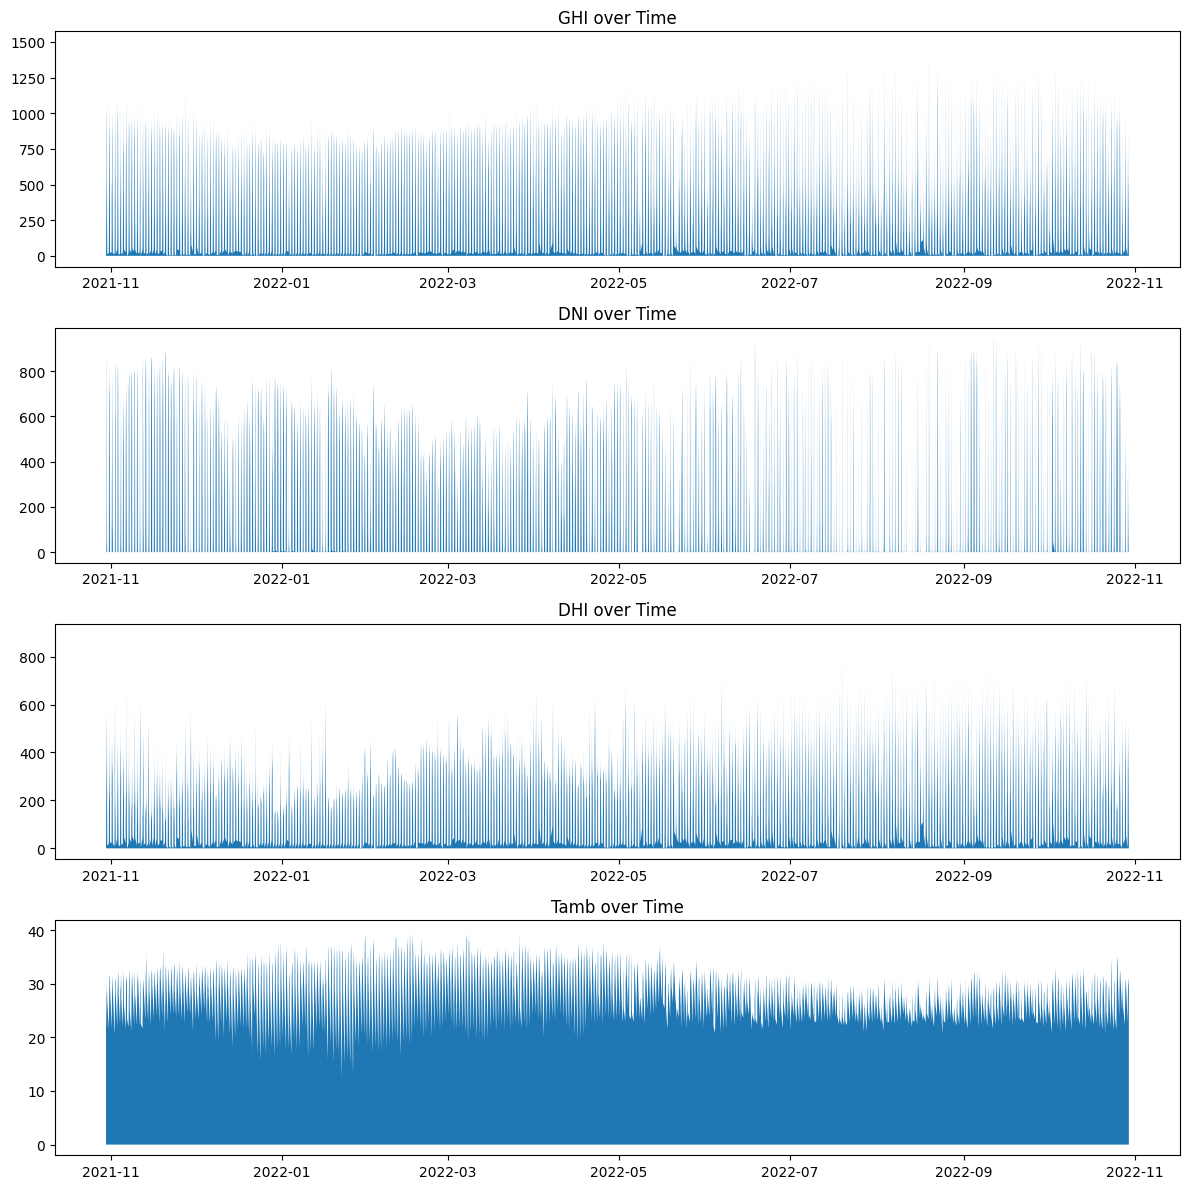

In [23]:
# Plot area plots of GHI, DNI, DHI, and Tamb over time
fig, ax = plt.subplots(4, 1, figsize=(12, 12))
ax[0].fill_between(df2.index, df2['GHI'])
ax[0].set_title('GHI over Time')
ax[1].fill_between(df2.index, df2['DNI'])
ax[1].set_title('DNI over Time')
ax[2].fill_between(df2.index, df2['DHI'])
ax[2].set_title('DHI over Time')
ax[3].fill_between(df2.index, df2['Tamb'])
ax[3].set_title('Tamb over Time')
plt.tight_layout()
plt.show()

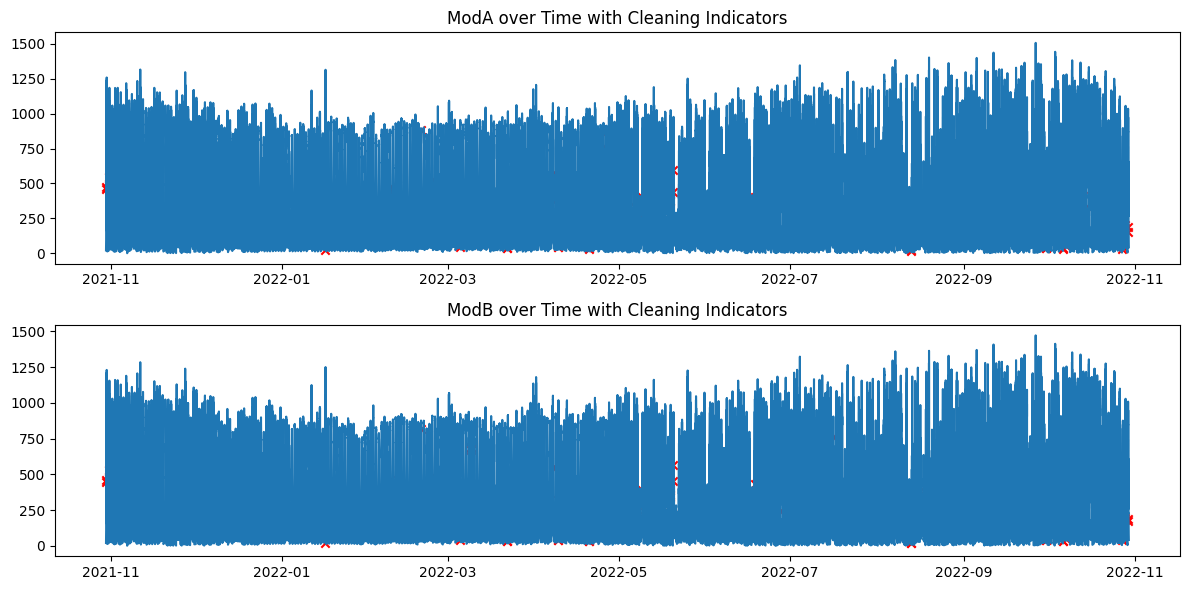

In [24]:
# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot ModA with cleaning indicators
ax[0].plot(df2['ModA'])
ax[0].scatter(df2.index[df2['Cleaning'] == 1], df2['ModA'][df2['Cleaning'] == 1], c='red', marker='x')
ax[0].set_title('ModA over Time with Cleaning Indicators')

# Plot ModB with cleaning indicators
ax[1].plot(df2['ModB'])
ax[1].scatter(df2.index[df2['Cleaning'] == 1], df2['ModB'][df2['Cleaning'] == 1], c='red', marker='x')
ax[1].set_title('ModB over Time with Cleaning Indicators')

plt.tight_layout()
plt.show()

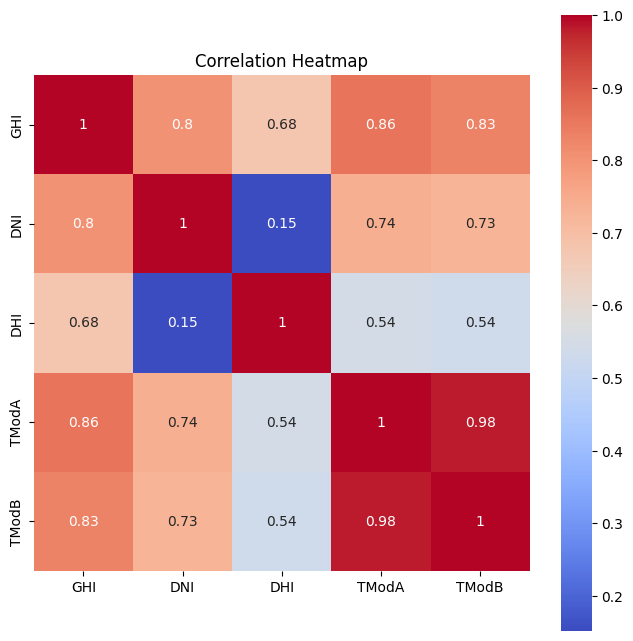

In [25]:
#correlation heatmap
# Select the relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
corr_matrix = df2[corr_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

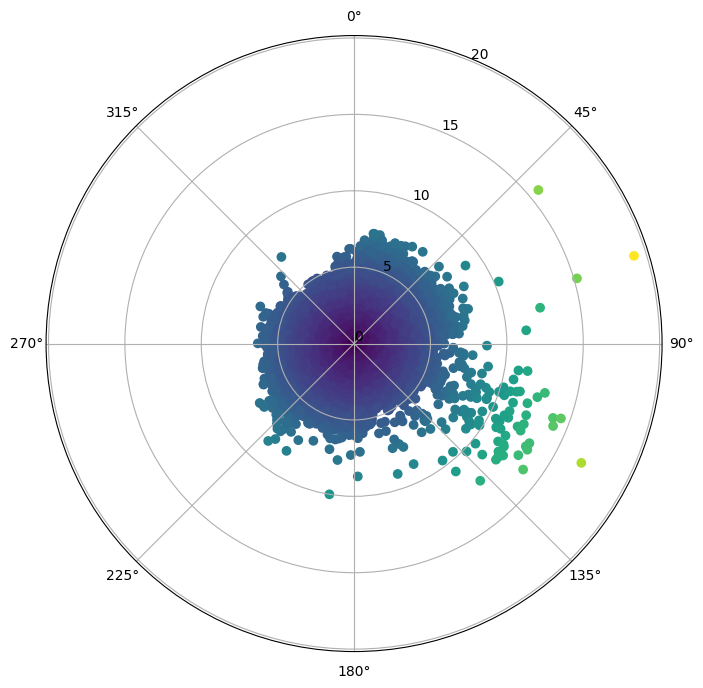

In [26]:
# Convert wind direction to radians
wd_rad = np.deg2rad(df2['WD'])

# Create a polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.scatter(wd_rad, df2['WS'], c=df2['WS'], cmap='viridis')
ax.set_rticks([0, 5, 10, 15, 20])  # Customize the radial ticks
ax.set_theta_zero_location('N')  # Set the zero direction to North
ax.set_theta_direction(-1)  # Set the direction to clockwise
plt.show()

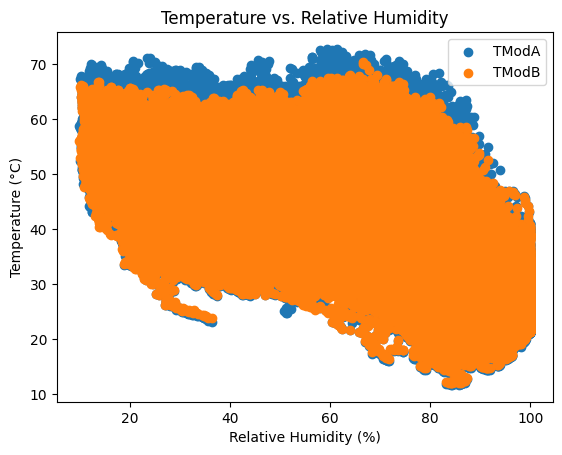

In [27]:
#Temperature analysis
# Create a scatter plot
plt.scatter(df2['RH'], df2['TModA'], label='TModA')
plt.scatter(df2['RH'], df2['TModB'], label='TModB')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Relative Humidity')
plt.legend()
plt.show()

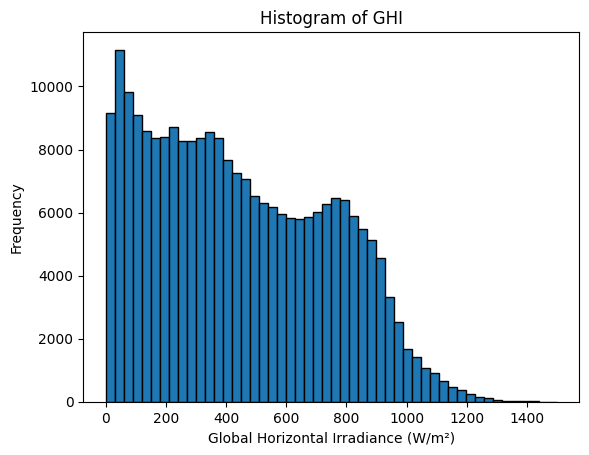

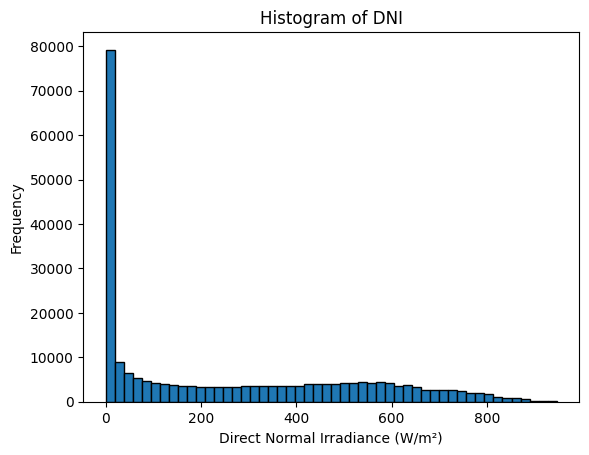

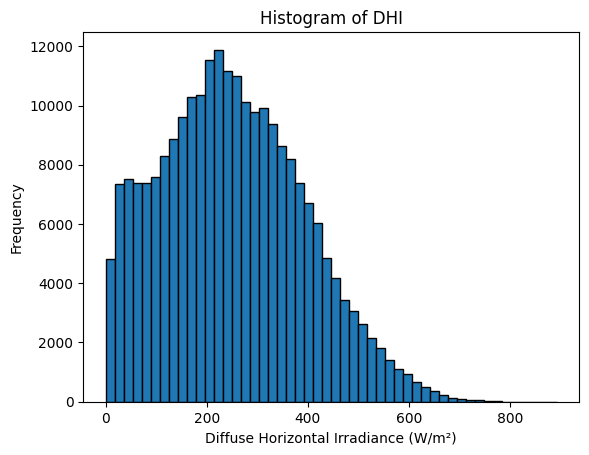

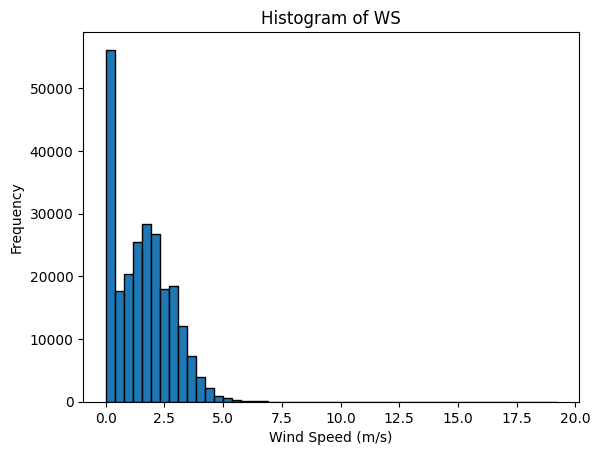

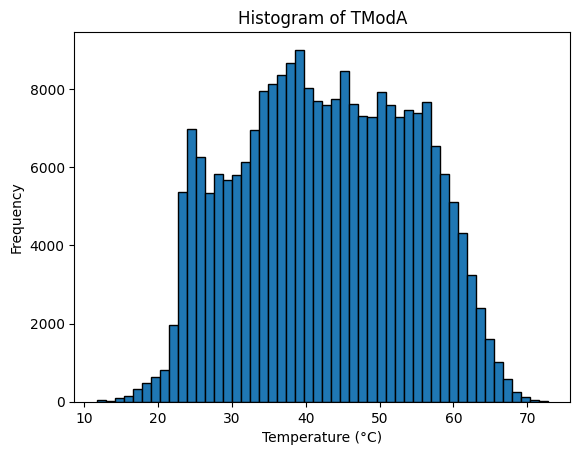

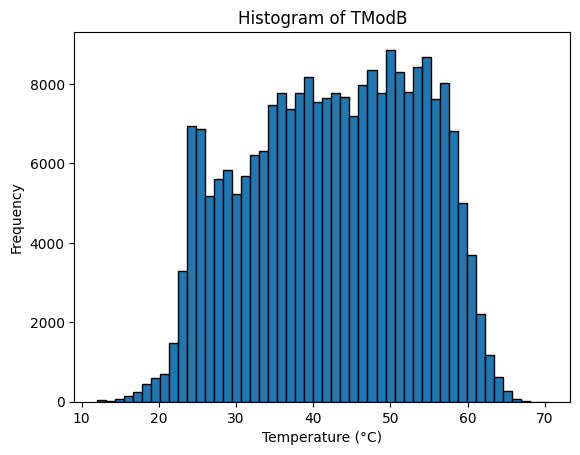

In [28]:
# Create a histogram of GHI
plt.hist(df2['GHI'], bins=50, edgecolor='black')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of GHI')
plt.show()

# Create a histogram of DNI
plt.hist(df2['DNI'], bins=50, edgecolor='black')
plt.xlabel('Direct Normal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of DNI')
plt.show()

# Create a histogram DHI
plt.hist(df2['DHI'], bins=50, edgecolor='black')
plt.xlabel('Diffuse Horizontal Irradiance (W/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of DHI')
plt.show()

# WS histogram
plt.hist(df2['WS'], bins=50, edgecolor='black')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Histogram of WS')
plt.show()

# Create a histogram for TModA
plt.hist(df2['TModA'], bins=50, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of TModA')
plt.show()

# Create a histogram for TModB
plt.hist(df2['TModB'], bins=50, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of TModB')
plt.show()

In [30]:
# Calculate Z-scores
df2['GHI_Z'] = (df2['GHI'] - df2['GHI'].mean()) / df2['GHI'].std()
df2['DNI_Z'] = (df2['DNI'] - df2['DNI'].mean()) / df2['DNI'].std()
df2['DHI_Z'] = (df2['DHI'] - df2['DHI'].mean()) / df2['DHI'].std()
df2['WS_Z'] = (df2['WS'] - df2['WS'].mean()) / df2['WS'].std()
df2['TModA_Z'] = (df2['TModA'] - df2['TModA'].mean()) / df2['TModA'].std()
df2['TModB_Z'] = (df2['TModB'] - df2['TModB'].mean()) / df2['TModB'].std()

In [31]:
# Flag outliers
df2['GHI_Outlier'] = np.where(np.abs(df2['GHI_Z']) > 2, 1, 0)
df2['DNI_Outlier'] = np.where(np.abs(df2['DNI_Z']) > 2, 1, 0)
df2['DHI_Outlier'] = np.where(np.abs(df2['DHI_Z']) > 2, 1, 0)
df2['WS_Outlier'] = np.where(np.abs(df2['WS_Z']) > 2, 1, 0)
df2['TModA_Outlier'] = np.where(np.abs(df2['TModA_Z']) > 2, 1, 0)
df2['TModB_Outlier'] = np.where(np.abs(df2['TModB_Z']) > 2, 1, 0)

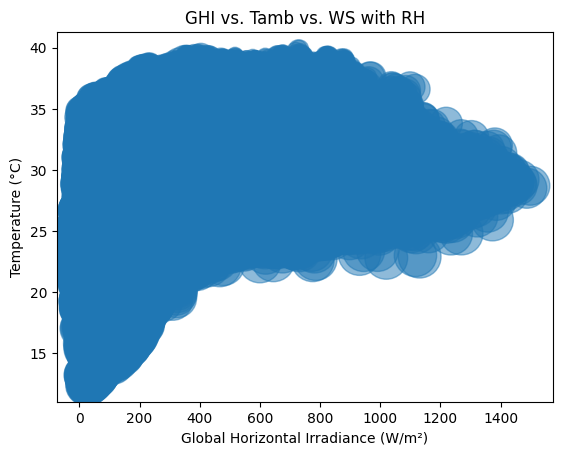

In [32]:
# Create a bubble chart: GHI vs. Tamb vs. WS with bubble size representing RH
plt.scatter(df2['GHI'], df2['Tamb'], s=df2['RH']*10, alpha=0.5)
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Temperature (°C)')
plt.title('GHI vs. Tamb vs. WS with RH')
plt.show()